In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("Breast_cancer_data[1].csv")
df = df.sort_values(by="mean_area")
print(df.shape)
df.head(25)

(569, 6)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
101,6.981,13.43,43.79,143.5,0.11700,1
539,7.691,25.44,48.34,170.4,0.08668,1
538,7.729,25.49,47.98,178.8,0.08098,1
568,7.760,24.54,47.92,181.0,0.05263,1
46,8.196,16.84,51.71,201.9,0.08600,1
151,8.219,20.70,53.27,203.9,0.09405,1
314,8.597,18.60,54.09,221.2,0.10740,1
525,8.571,13.10,54.53,221.3,0.10360,1
61,8.598,20.98,54.66,221.8,0.12430,1
59,8.618,11.79,54.34,224.5,0.09752,1


In [5]:
#division into training and testing data
df = np.array(df)

idx = 3*df.shape[0]//4
c = df.shape[1]
x_train = df[:idx,:c-1]
x_test = df[idx:,:c-1]
y_train = df[:idx,c-1:]
y_test = df[idx:,c-1:]

for i in range(x_train.shape[1]):
    mean = np.mean(x_train[:,i])
    std =  np.std(x_train[:,i])
    x_train[:,i] = (x_train[:,i]-mean)/std
    x_test[:,i] = (x_test[:,i]-mean)/std
    
ones = np.ones((x_train.shape[0],1))
x_train = np.concatenate((ones,x_train),axis=1)

ones = np.ones((x_test.shape[0],1))
x_test = np.concatenate((ones,x_test),axis=1)

print("\nx test data:\n",x_test)
print("\nx train data:\n",x_train)
print("\ny test data:\n",y_test)
print("\ny train data:\n",y_train)


x test data:
 [[ 1.00000000e+00  1.89125257e+00  1.30576669e+00  1.89262583e+00
   2.16062561e+00 -7.60992673e-01]
 [ 1.00000000e+00  2.06865498e+00 -5.95008696e-01  2.10333781e+00
   2.20283273e+00  2.60178631e-01]
 [ 1.00000000e+00  1.99104143e+00 -7.30089181e-01  2.06281628e+00
   2.23703504e+00 -8.40530237e-03]
 [ 1.00000000e+00  1.98549760e+00  1.13450393e+00  1.81158276e+00
   2.27050965e+00 -8.95629863e-01]
 [ 1.00000000e+00  2.04647968e+00  5.16993148e-01  2.24921534e+00
   2.27778674e+00  1.51679241e+00]
 [ 1.00000000e+00  2.05202351e+00 -8.86879029e-01  1.94125167e+00
   2.28651924e+00 -5.64351386e-03]
 [ 1.00000000e+00  1.69721869e+00  6.13479209e-01  1.82779137e+00
   2.30907822e+00  1.17156884e+00]
 [ 1.00000000e+00  2.10746176e+00  5.62722105e-02  2.30594549e+00
   2.32363239e+00  7.98727391e-01]
 [ 1.00000000e+00  2.04647968e+00 -1.58409274e-01  2.16006796e+00
   2.33891428e+00  6.19211138e-01]
 [ 1.00000000e+00  2.06311116e+00  7.24438178e-01  2.09523350e+00
   2.35783

In [6]:
def hypothesis(b,X):
    z= np.dot(X,b)
    #print(z)
    return sigmoid(z)

def sigmoid(z):
    return 1/(1+np.exp(-1*z))

def FindCost(h,y):
    r = y.shape[0]
    cost = np.mean(y*np.log(h)+(1-y)*np.log(1-h))
    #print(cost)
    return cost*-1
    
def gradient_descent(X,y,alpha,epoch):
    r = X.shape[0]
    c = X.shape[1]
    theta = np.ones((c,1))
    min_cost=None
    min_theta=[]
    Cost_list=[]
    for i in range(epoch):
        h = hypothesis(theta,X)
        grad = np.dot(X.T,(h-y))
        grad/=r
        theta = theta - alpha*grad
        cost = FindCost(h,y)
        #print(cost)
        Cost_list.append(cost)
        if min_cost is None or min_cost>cost:
            min_cost=cost
            min_theta=list(theta)
    return theta,Cost_list

def calAccuracy(theta,X,y):
    h = hypothesis(theta,X)
    correct=0
    for i in range(y.shape[0]):
        if h[i]>=0.5:
            if y[i]==1: correct+=1
            print("predicted: ",1,end='\t\t')
        elif h[i]<0.5:
            if y[i]==0: correct+=1
            print("predicted: ",0,end='\t\t')
        print("actual: ",y[i])
    return correct*100/y.shape[0]

def plotCost(cost):
    plt.plot(cost)
    plt.xlabel('number of iterations')
    plt.ylabel('Costs')

In [7]:
alpha = 0.05
epoch = 10000
theta,cost = gradient_descent(x_train,y_train,alpha,epoch)
accuracy = calAccuracy(theta,x_test,y_test)

predicted:  0		actual:  [0.]
predicted:  0		actual:  [1.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [1.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [1.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [1.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [1.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0		actual:  [0.]
predicted:  0	

the accuracy of the model: 96.5034965034965 %
[[ 3.67463731]
 [ 0.12415694]
 [-1.43008058]
 [-1.35026502]
 [-1.18253751]
 [-1.96934889]]


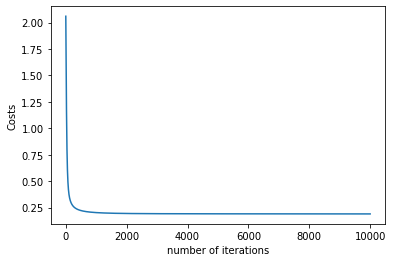

In [8]:
print(f"the accuracy of the model: {accuracy} %")
print(theta)
plotCost(cost)